# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

### <font color="red">Exercise 01.1: test of Pseudo-Random Number generator<font>

We were given a Pseudo-Random Number generator and, before any attempt to use it in Monte Carlo simulations, we want to check that it really produces a uniform distribution between 0 and 1.

### Mean value

It's easy to find analytically the mean value: $\langle r \rangle = \int_0^1 r dr = \frac{1}{2}$. To verify that our generator behaves as it's expected to, we calculate the mean of a large number of throws and use as uncertainty the standard deviation of the mean. We ask our generator for $10^6$ random numbers and divide them in $100$ blocks to calculate the uncertainty through the all process of extraction, not just after all the numbers have been drawn. We represent then the mean value minus the expected value of $\frac{1}{2}$.

The results of the experiment is that the mean value is compatible with the expected value.

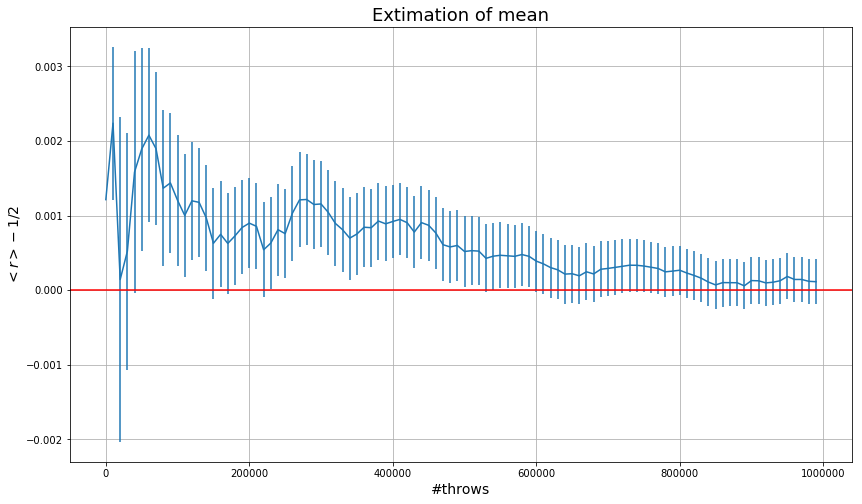

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N


x = np.arange(N)      # [0,1,2,...,N-1]

sum_prog, err_prog = np.loadtxt("./1.1/Prima_parte/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    
    
x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.title('Extimation of mean', fontsize=18)
plt.xlabel('#throws', fontsize=14)
plt.ylabel('$<r>-1/2$', fontsize=14)
plt.axhline(y=0., color='r', linestyle='-')
plt.grid(True)
plt.show()

### Variance

We calculate $\sigma^2 = \int_0^1 (r-1/2)^2 dr = \frac{1}{12}$. As a consequence, we apply the same procedure followed in the previous part: calculating the variance of a large number of throws and using the standard deviation of the mean as uncertainty. Also the amount of numbers drawn ($10^6$) and the evaluation of the uncertanties during the process is the same. Again, we represent then the variance minus its expected value of $\frac{1}{12}$.

One more time the results of the experiment is that the variance is compatible with a value of $\frac{1}{12}$.

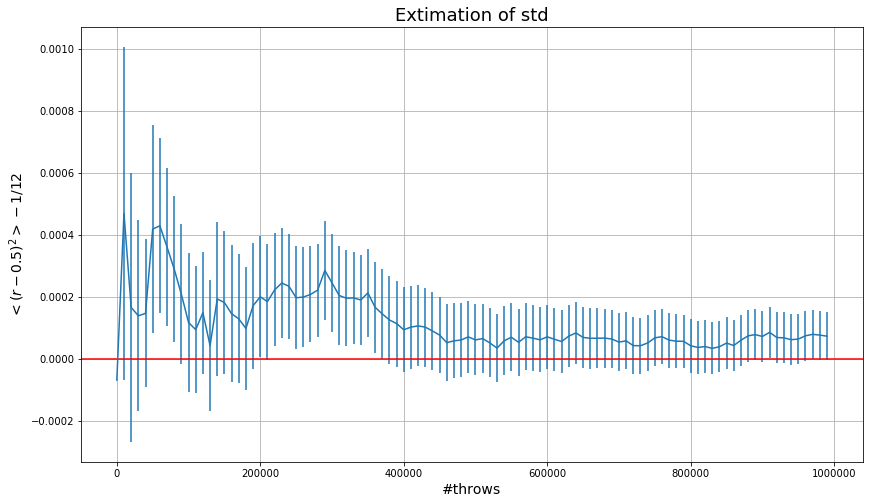

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]

sum_prog, err_prog = np.loadtxt("./1.1/Seconda_parte/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    
   
x*=L # Number of throws = block * (Number of throws in each block)
fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog-(1/12),yerr=err_prog)
plt.title('Extimation of std', fontsize=18)
plt.xlabel('#throws', fontsize=14)
plt.ylabel("$<(r-0.5)^2>-1/12$", fontsize=14)
plt.axhline(y=0., color='r', linestyle='-')
plt.grid(True)
plt.show()

### The $\chi^2$ test

In the end, we have to find a way to check the hypothesis that the numbers are drawn from a uniform distribution. Since it is rarely possible for this hypothesis to be proven (see https://dilbert.com/strip/2001-10-25 for a funny example), we estimate the probability that the numbers are not drawn from a uniform distribution. Then, hoping that probability to be low, we can claim at least that it's very unlikely for the numbers to have been drawn from a not-uniform distribution. 

The $\chi^2$ test implements this procedure. We divide the $[0,1]$ interval into $100$ identical sub-intervals and then extract $10^4$ numbers, putting each one of them in the appropriate bin. For each bin the expected value of numbers in it should be $100$ (for a uniform distribution). The $\chi^2$ consists, for each bin, of the squared difference between the expected and the measured value, divided by the variance of the distribution; this result is then summed over all the intervals. For variance in this case we use the expected value, which is a good approximation since each interval is governed by a binomial distribution.

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

We run the test for $100$ times and see the results. About its interpretation we notice the following facts.

Consider $x$ following a binomial distribution, the mean value of $\left( x - \langle x \rangle \right)^2/ \sigma_x^2$ is clearly 1, since at numerator we have the variance definition, divided by the variance. Making out the calculations, it can be pointed out that the variance of $\left( x - \langle x \rangle \right)^2/ \sigma_x^2$ is around 1:

$$\langle \left( \frac{x - \langle x \rangle}{\sigma_x^2} -1 \right)^2 \rangle = \frac{1}{\sigma_x^4}\langle x^2 + \langle x \rangle^2 +\sigma_x^4 -2\langle x \rangle x +2 \langle x \rangle \sigma_x^2 -2x \sigma_x^2 \rangle = \frac{1}{\sigma_x^4} \left( \langle x^2 \rangle - \langle x \rangle^2 +\sigma_x^4 \right) = \frac{\sigma_x^4+\sigma_x^2}{\sigma_x^4}=1+\frac{1}{\sigma_x^2}$$

In our case, since $\sigma_x^2 \approx \langle x \rangle$, which is 100, the variance approaches to 1. For the central limit theorem summing togheter $100$ variables with mean value $1$ and variance $1$ should lead to a gaussian distributed variable, the $\chi^2$, with mean value of $100$ and standard deviation of $10$.

This is almost exactly what we obtain from the simulation: the mean value of the $\chi^2$ is about $100$ and its standard deviation is a bit more than $10$ (we approximated $\sigma_x^2 \approx \langle x \rangle$, so we can't pretend the results to be exact). It's worth noting that the results of the experiment are indipendent from the number of extracted numbers; we repeated the same simulation extracting $10^8$ numbers ($10000$ times the first case numbers) and divinding in blocks in the same way as before and the result is quite the same.

After this test, nothing brings us to consider that the points might not be drawn from a non-uniform distribution, so the test is a success.

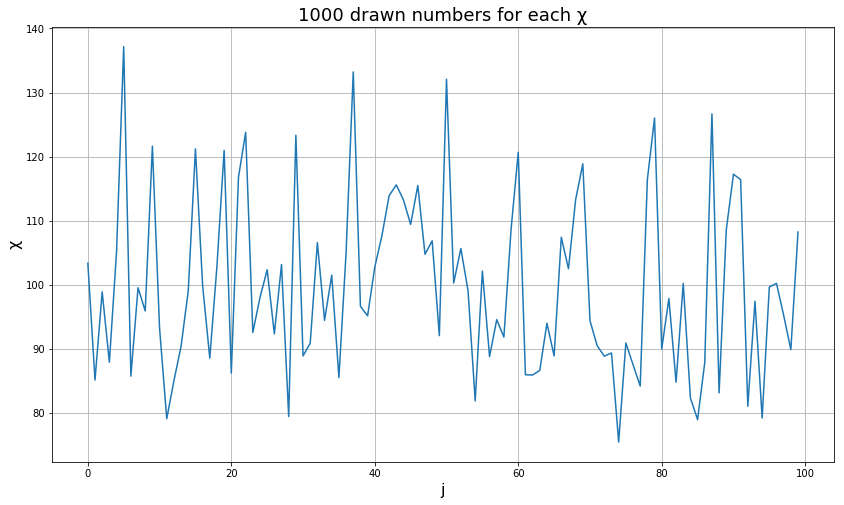

Mean of the χ distribution:
99.764


Standard deviation of the χ distribution:
13.763


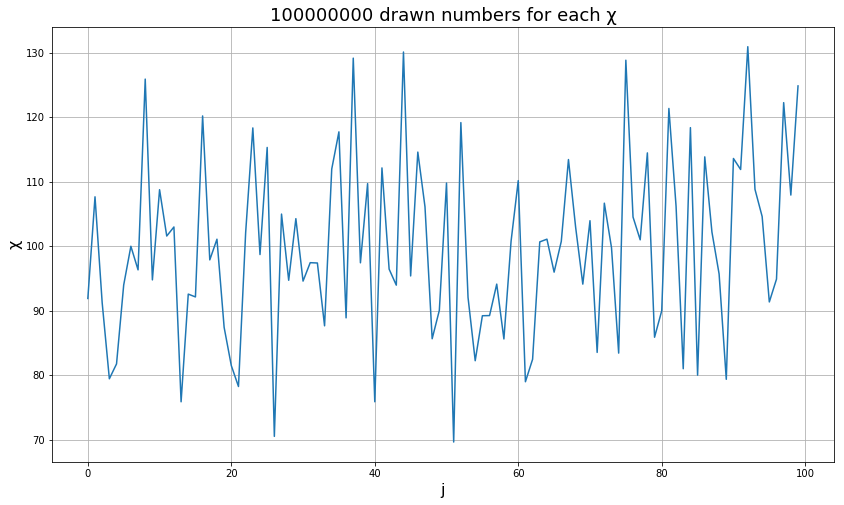

Mean of the χ distribution:
99.672


Standard deviation of the χ distribution:
13.982


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N=100                 # Number of chi

x = np.arange(N)      # [0,1,2,...,N-1]

chi_vect = np.loadtxt("./1.1/Terza_parte/risultati.dat", usecols=(0), unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.title('1000 drawn numbers for each χ', fontsize=18)
plt.plot(x,chi_vect)
plt.xlabel('j', fontsize=16)
plt.ylabel('χ', fontsize=16)
plt.grid(True)
plt.show()
print('Mean of the χ distribution:')
print(round(np.mean(chi_vect),3))
print('\n')
print('Standard deviation of the χ distribution:')
print(round(np.std(chi_vect),3))

chi_vect = np.loadtxt("./1.1/Terza_parte/risultati_10^8_lanci.dat", usecols=(0), unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.title('100000000 drawn numbers for each χ', fontsize=18)
plt.plot(x,chi_vect)
plt.xlabel('j', fontsize=16)
plt.ylabel('χ', fontsize=16)
plt.grid(True)
plt.show()
print('Mean of the χ distribution:')
print(round(np.mean(chi_vect),3))
print('\n')
print('Standard deviation of the χ distribution:')
print(round(np.std(chi_vect),3))

### <font color="red">Exercise 01.2: generation of Gauss and Lorentz distributions and check Central Limit Theorem<font>

Now that we have verified our generator works properly and produces pseudo-random numbers uniformly distributed, we extend it to generate other two probability distributions: the exponential and the Cauchy-Lorentz distribution. Respectevely $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ and $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$. We use the technique of the inverse transform sampling to implement this task.

Then we verify that our updated generator works by computing the probability distribution of the throwning of different dice.

First, we throw a normal dice with 6 faces. We realize four experiments: for $10^4$ times we throw 1, 2, 10 or 100 dice simultaneausly and calculate their mean in each of the $10^4$ steps. We expect to get a uniform distribution in the first case, while we expect some distribution that resembles a Gaussian for the 2 case and distributions that are really gaussian in the 10 and 100 cases, knowing the Central Limit Theorem. In particular we can try and fit the 100 case with a Gaussian, which we expect to have $3.5$ as mean and (knowing the original distribution has a variance of $\frac{35}{12}$) approximately $0.17$ as standard deviation. The results confirm this prevision.

/home/davide/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


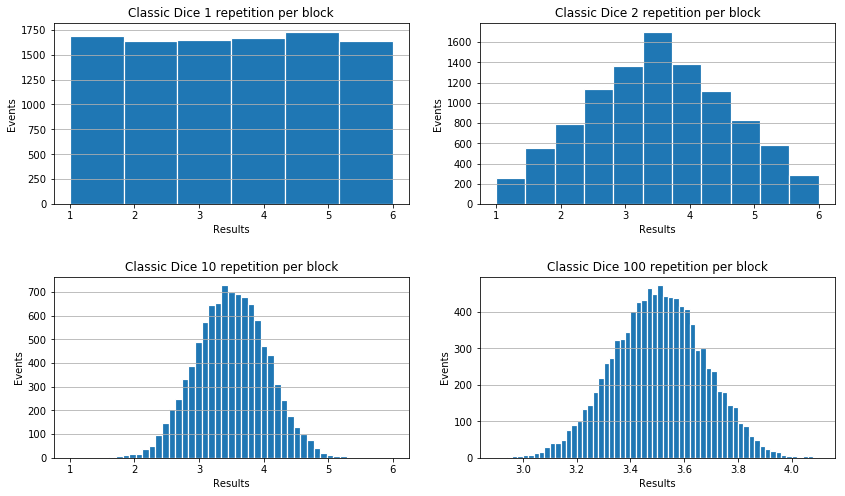

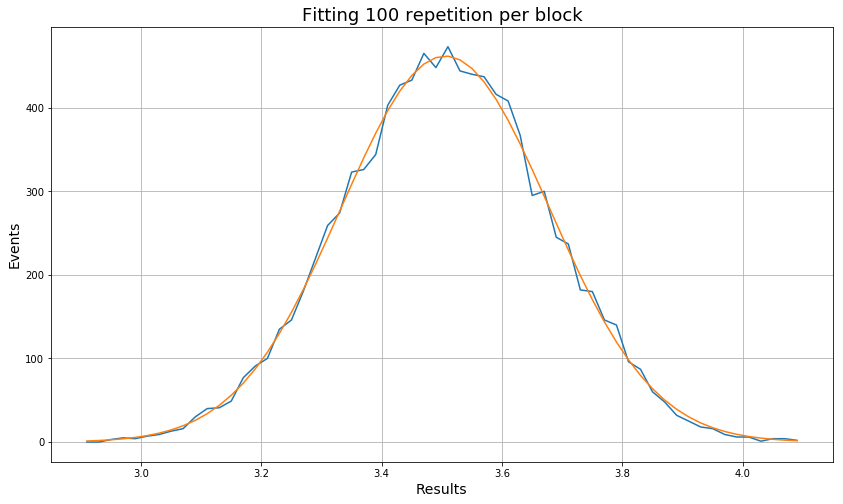

Optimized parameters [a,b,c] =
[461.81769797  16.69265366   3.50554901]
Parameters uncertainty =
[3.08770488e+00 2.57772167e-01 1.33611581e-03] 

Mean =  3.5055490117619144
Std =  0.17307020606416137


In [5]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import curve_fit

def f(x,a,b,c):  # defining the fitting function, Gaussian
    return a * np.exp(-b*(x-c)**2)

N=10000               # Number of blocks
L=[1,2,10,100]        # Number of throws in each block

classic_dice = [np.zeros(N) for i in range(4)] #Creo una matrice 4 x N; la prima componente varia con il numero di lanci in ogni blocco.

file = open("./1.2/dado_norm.dat", "r")
raw=file.readlines()
file.close()

classic_dice[0], classic_dice[1], classic_dice[2], classic_dice[3], = np.loadtxt("./1.2/dado_norm.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')    

# the histograms of the data
n_bins = [6,11,49,60]
interval_range=[(1,6),(1,6),(1,6),(2.9,4.1)]#estremi per ogni grafico
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for j in range(4):
    plt.subplot(2, 2, j+1)
    n, bins, patches = plt.hist(classic_dice[j], n_bins[j], interval_range[j], edgecolor='white', linewidth=1.2)
    plt.xlabel('Results')
    plt.ylabel('Events')
    plt.title('Classic Dice '+str(L[j])+' repetition per block')
    plt.grid(True, axis='y')

fig2=plt.figure(figsize=(14, 8))
x = np.linspace(2.91,4.09,n_bins[3],endpoint=True)

p_opt, p_cov = curve_fit(f, x, n)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,n)
plt.plot(x,y_fit) # plotting fitted function
plt.title('Fitting '+str(L[3])+' repetition per block', fontsize=18)
plt.xlabel('Results', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.grid(True)

plt.show()


print("Optimized parameters [a,b,c] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)),'\n')

print("Mean = ", p_opt[2])
print("Std = ", np.sqrt(1/(2*p_opt[1])))

Then, we throw an exponential dice (an ideal dice that can give as results real numbers distributed as an exponential with $\lambda=1$). Again we realize four experiments: for $10^4$ times we throw 1, 2, 10 or 100 dice simultaneausly and calculate the mean of their results in each of the $10^4$ steps. We expect to get an exponential distribution in the first case, while we'll see some distribution that resembles a Gaussian for the 2 case and distributions that are really gaussian in the 10 and 100 cases, according to the Central Limit Theorem. In particular we can try and fit the 100 case with a Gaussian, which we expect to have $1$ as mean and (knowing the original distribution has a variance of $1$) approximately $\frac{1}{10}$ as standard deviation, in accord with our results.

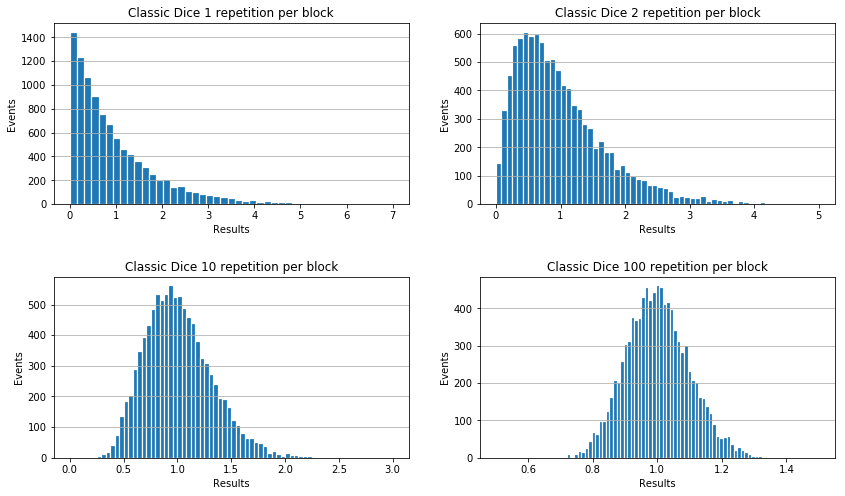

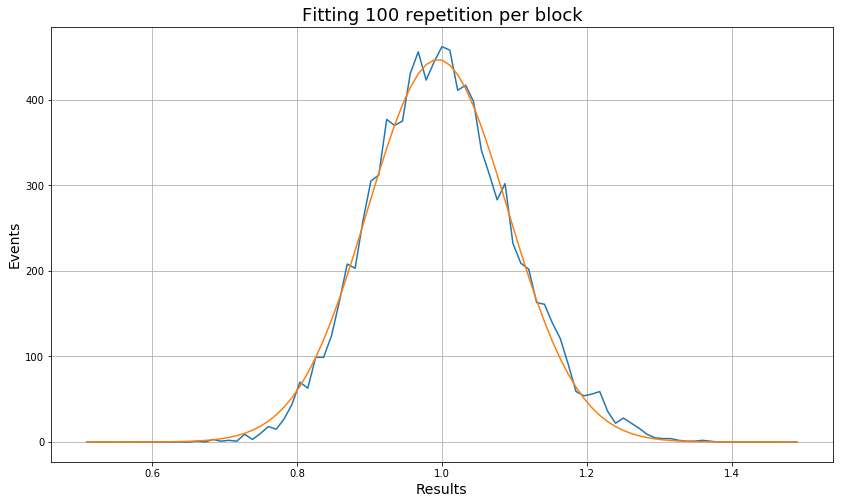

Optimized parameters [a,b,c] =
[447.04455313  53.27172494   0.99417205]
Parameters uncertainty =
[3.80388938e+00 1.04682074e+00 9.51883814e-04] 

Mean =  0.9941720542318709
Std =  0.09688055597221777


In [6]:
import matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.optimize import curve_fit

def f(x,a,b,c):  # defining the fitting function, Gaussian
    return a * np.exp(-b*(x-c)**2)

N=10000               # Number of blocks
L=[1,2,10,100]        # Number of throws in each block

exp_dice = [np.zeros(N) for i in range(4)] #Creo una matrice 4 x N; la prima componente varia con il numero di lanci in ogni blocco.

file = open("./1.2/dado_exp.dat", "r")
raw=file.readlines()
file.close()

exp_dice[0], exp_dice[1], exp_dice[2], exp_dice[3], = np.loadtxt("./1.2/dado_exp.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')    

# the histograms of the data
n_bins = [45,60,72,91]#bin per ogni grafico
interval_range=[(0,7),(0,5),(0,3),(0.5,1.5)]#estremi per ogni grafico
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for j in range(4):
    plt.subplot(2, 2, j+1)
    n, bins, patches = plt.hist(exp_dice[j], n_bins[j], interval_range[j], edgecolor='white', linewidth=1.2)
    plt.xlabel('Results')
    plt.ylabel('Events')
    plt.title('Classic Dice '+str(L[j])+' repetition per block')
    plt.grid(True, axis='y')
    
fig2=plt.figure(figsize=(14, 8))
x = np.linspace(0.51,1.49,n_bins[3],endpoint=True)

p_opt, p_cov = curve_fit(f, x, n)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,n)
plt.plot(x,y_fit) # plotting fitted function
plt.title('Fitting '+str(L[3])+' repetition per block', fontsize=18)
plt.xlabel('Results', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.grid(True)

plt.show()


print("Optimized parameters [a,b,c] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)),'\n')
print("Mean = ", p_opt[2])
print("Std = ", np.sqrt(1/(2*p_opt[1])))

At last, we throw a lorentzian dice (an ideal dice that can give real numbers distributed as a Cauchy-Lorentz distribution, with mean 0 and $\Gamma=1$). Again we realize four experiments: for $10^4$ times we throw 1, 2, 10 or 100 dice simultaneausly and compute their mean in each of the $10^4$ steps. We expect to get a lorentzian distribution in the four cases, according to the generalized version of the Central Limit Theorem. In particular we can try and fit the 100 case with a Cauchy-Lorentz distribution.

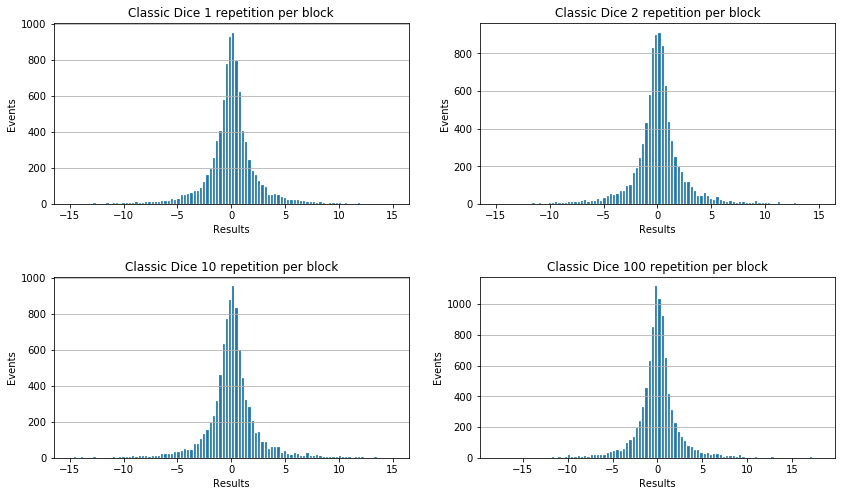

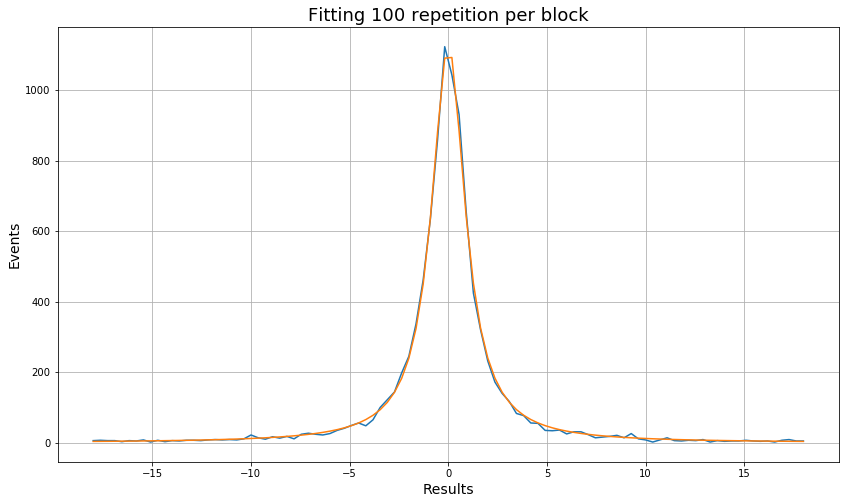

Optimized parameters [a,b,c] =
[3.67881792e+03 1.04116020e+00 2.56380862e-03]
Parameters uncertainty =
[2.21656502e+01 8.87226429e-03 6.27092909e-03] 

Mean =  0.0025638086171762037
Gamma =  1.0411601956999796


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
from math import sqrt
from scipy.optimize import curve_fit

def f(x,a,b,c):  # defining the fitting function, Gaussian
    return a * (b/np.pi) * (1/((x-c)*(x-c) + b*b))

N=10000               # Number of blocks
L=[1,2,10,100]        # Number of throws in each block

lor_dice = [np.zeros(N) for i in range(4)] #Creo una matrice 4 x N; la prima componente varia con il numero di lanci in ogni blocco.

file = open("./1.2/dado_lor.dat", "r")
raw=file.readlines()
file.close()

lor_dice[0], lor_dice[1], lor_dice[2], lor_dice[3], = np.loadtxt("./1.2/dado_lor.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')    

# the histograms of the data
n_bins = [100,100,100,100]#bin per ogni grafico
interval_range=[(-15,15),(-15,15),(-15,15),(-18,18)]#estremi per ogni grafico
fig=plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for j in range(4):
    plt.subplot(2, 2, j+1)
    n, bins, patches = plt.hist(lor_dice[j], n_bins[j], interval_range[j], edgecolor='white', linewidth=1.2)
    plt.xlabel('Results')
    plt.ylabel('Events')
    plt.title('Classic Dice '+str(L[j])+' repetition per block')
    plt.grid(True, axis='y')
    
fig2=plt.figure(figsize=(14, 8))
x = np.linspace(-17.99,17.99,n_bins[3],endpoint=True)

p_opt, p_cov = curve_fit(f, x, n)
y_fit = f(x,p_opt[0],p_opt[1],p_opt[2])
plt.plot(x,n)
plt.plot(x,y_fit) # plotting fitted function
plt.title('Fitting '+str(L[3])+' repetition per block', fontsize=18)
plt.xlabel('Results', fontsize=14)
plt.ylabel('Events', fontsize=14)
plt.grid(True)

plt.show()


print("Optimized parameters [a,b,c] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)),'\n')

print("Mean = ", p_opt[2])
print("Gamma = ", p_opt[1])

### <font color="red">Exercise 01.3: Estimation of $\pi$ through the Buffon's experiment<font>

The Buffon’s experiment is performed as follows: a needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines separated by a distance $d$ ($d > L$). The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. By inverting this formula and substituting $P$ with ${N_{hit}}/{N_{thrown}}$ , namely the number of times the needle intersects a line, divided by the total number of throws, we get an estimate of $\pi$:
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

We simulate the throwing for $10^8$ times and divide them in $100$ blocks to calculate uncertainty through the all process of extraction according to the standard deviation of the mean. We represent then the mean values and their uncertainties. Since it would be inelegant to use $\pi$ to evaluate $\pi$, we'll implement the extraction of the needle using an accept-reject method to get its angular distribution.

The results of the experiment is that the mean value is compatible with $\pi$.

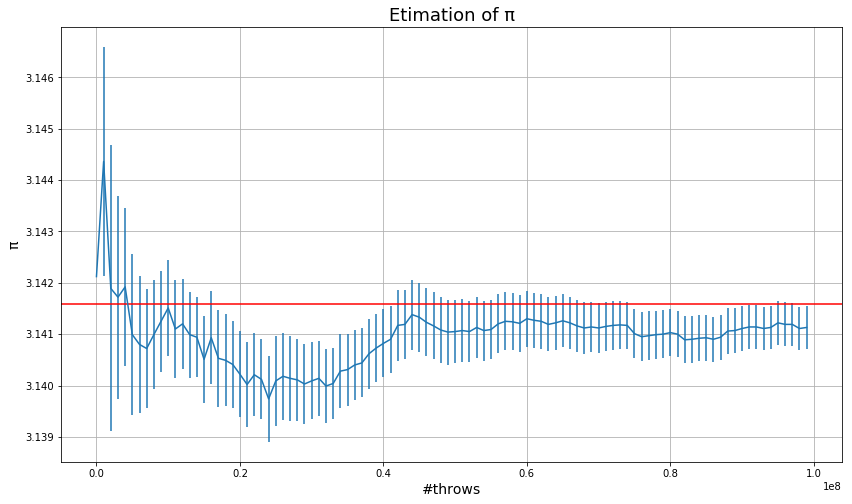

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N


x = np.arange(N)      # [0,1,2,...,N-1]

sum_prog, err_prog = np.loadtxt("./1.3/risultati.dat", usecols=(0,1), delimiter=' ', unpack='true')    

x*=L # Number of throws = block * (Number of throws in each block)

fig=plt.figure(figsize=(14, 8))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.title('Etimation of π', fontsize=18)
plt.xlabel('#throws', fontsize=14)
plt.ylabel('π', fontsize=14)
plt.grid(True)
plt.show()